In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from scipy.stats import iqr

# Load the Breast Cancer dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
#use label encoding to convert categorical variables to numeric values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['diagnosis'] = labelencoder.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
y = data['diagnosis']
X = data.drop(['diagnosis','id'], axis=1)

In [4]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
import numpy as np
from scipy.stats import iqr

# Train an Isolation Forest model on the training data
clf = IsolationForest(random_state=123, bootstrap=True,n_estimators=100,max_features=1.0, max_samples=0.25)
clf.fit(X_train)

# Predict anomaly scores for the test data
y_pred=clf.predict(X_test)

#print the anomaly scores
anomaly_scores = clf.decision_function(X_test)
print(anomaly_scores)

# Calculate the Interquartile Range (IQR)
iqr_score = iqr(anomaly_scores)

[ 0.0969812  -0.15741286  0.01247032  0.06303664  0.04382242  0.03615951
  0.00084554  0.07869133  0.06307012  0.00189436  0.10205093  0.10155638
 -0.03864185  0.06359358  0.02807004 -0.01667985 -0.05184119  0.07580015
  0.06816691 -0.14672118  0.01007515 -0.08538691  0.02515635  0.08155132
  0.11671982  0.02575346  0.0441751   0.08770023  0.0831919   0.06876085
  0.09548817  0.02131164  0.07357095  0.04874186  0.01850174 -0.0027848
  0.07476029  0.04636257  0.06927436  0.12251249  0.10646093  0.06006163
  0.06299405  0.10996923  0.01848193  0.07291732  0.05674759  0.10665537
 -0.01648669  0.07105675  0.06320096  0.05356458  0.00065205  0.07720917
  0.10020422  0.02872967 -0.03801975  0.09147764 -0.14745192  0.0335738
  0.07739974 -0.00549758  0.07545355  0.07196632 -0.04175171  0.07438004
  0.08560743  0.09458605  0.11186678 -0.06761228  0.04661062  0.10667229
  0.08530671 -0.03189943 -0.02308029  0.11104605  0.01847356 -0.05558337
 -0.04965759  0.10189558  0.01637318  0.06489546  0.0

In [7]:
import numpy as np

# Calculate the median score
median_score = np.median(anomaly_scores)

# Calculate the threshold using the formula
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

print(threshold)

#prune the data


[0.44768896 2.76468377 0.6194761  0.01905239 0.22357607 0.32033979
 0.76626858 0.21673272 0.01947513 0.75302458 0.5117072  0.5054622
 1.26489739 0.02608523 0.42248998 0.98757127 1.43157263 0.18022424
 0.08383514 2.62967414 0.64972125 1.85517284 0.45928271 0.25284739
 0.69693922 0.45174266 0.21912254 0.330493   0.27356389 0.09133512
 0.42883555 0.50783192 0.15207493 0.16145562 0.54331405 0.81211089
 0.16709333 0.19150015 0.09781955 0.77008643 0.5673946  0.01851462
 0.01851462 0.61169582 0.54356425 0.14382117 0.06036291 0.56984993
 0.98513215 0.12032667 0.02112741 0.10055644 0.76871184 0.19801666
 0.48838769 0.41416045 1.25704184 0.37819243 2.63890157 0.35299096
 0.2004231  0.84636665 0.17584749 0.13181237 1.30416725 0.16229167
 0.30406604 0.41744406 0.63565725 1.63072282 0.18836791 0.57006353
 0.30026879 1.17975718 1.0683931  0.62529351 0.54366996 1.47882725
 1.40399915 0.5097455  0.57019258 0.04252476 0.69613344 0.50448699
 0.086086   0.54027406 1.1401699  0.54004199 1.91278136 0.28694

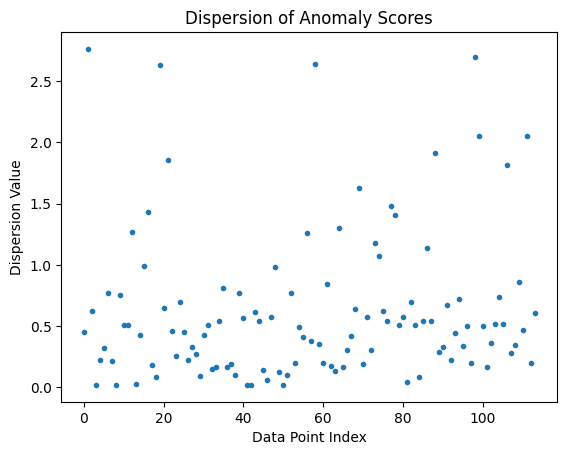

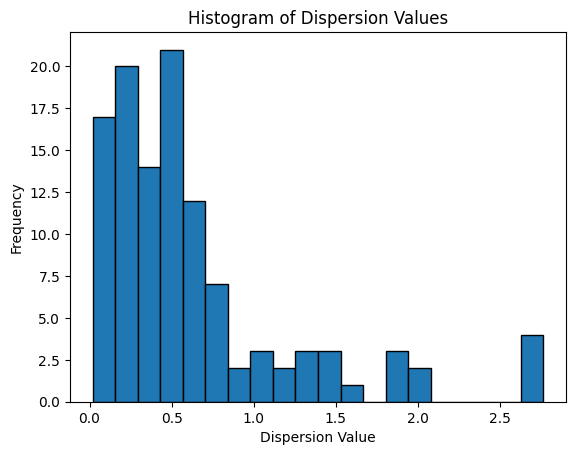

In [8]:
import matplotlib.pyplot as plt

# Calculate the dispersion vector
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

# Create a scatter plot of the dispersion values
plt.scatter(range(len(threshold)), threshold, marker='.')
plt.xlabel('Data Point Index')
plt.ylabel('Dispersion Value')
plt.title('Dispersion of Anomaly Scores')
plt.show()

# Alternatively, create a histogram of the dispersion values
plt.hist(threshold, bins=20, edgecolor='k')
plt.xlabel('Dispersion Value')
plt.ylabel('Frequency')
plt.title('Histogram of Dispersion Values')
plt.show()






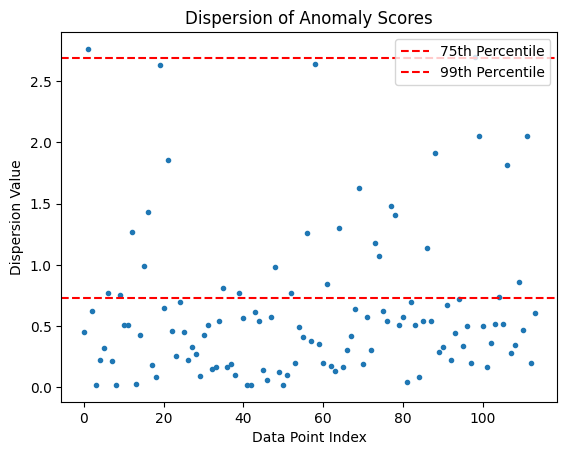

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the dispersion vector
threshold = np.sqrt((anomaly_scores - median_score)**2 / (iqr_score**2))

# Create a scatter plot of the dispersion values
plt.scatter(range(len(threshold)), threshold, marker='.')
plt.xlabel('Data Point Index')
plt.ylabel('Dispersion Value')
plt.title('Dispersion of Anomaly Scores')

# Calculate and mark the desired percentiles (e.g., 95th and 99th percentiles)
percentiles_to_mark = [75, 99]
percentile_values = np.percentile(threshold, percentiles_to_mark)
for percentile in percentiles_to_mark:
    plt.axhline(y=percentile_values[percentiles_to_mark.index(percentile)], color='r', linestyle='--', label=f'{percentile}th Percentile')

plt.legend(loc='upper right')
plt.show()
